### Logistic Regression from Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

#get training data
data_train = pd.read_csv('features.csv') #this is preprocessed data

data_train.head()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,0.047419,0,-0.091642,1,0,-0.048707,2
1,1,1,1,0.109919,1,0.109413,1,0,0.076277,0
2,2,1,3,-0.140081,1,-0.041378,0,0,-0.047390,2
3,3,1,1,0.109919,1,0.071716,1,0,0.040786,2
4,4,0,3,0.047419,0,0.071716,0,0,-0.047146,2


In [2]:
data_train.insert(0, 'Ones', 1) # add column of ones for matrix multiplication later

In [3]:
train=data_train.sample(frac=0.8,random_state=200)
cross=data_train.drop(train.index)
# make training data in to matrix
y_t = train['Survived']
X_t = train.drop("Survived",axis=1)

Y = y_t.values
X_temp = X_t.values
m, n = X_temp.shape
X=np.ones((m,n+1))

X[:,-n:] = X_temp
Y.shape = (m, 1)

# make cross validation data into matrix
crossy_t = cross['Survived']
crossX_t = cross.drop("Survived",axis=1)

crossY = crossy_t.values
crossX_temp = crossX_t.values
crossm, crossn = crossX_temp.shape
crossX=np.ones((crossm,crossn+1))

crossX[:,-crossn:] = crossX_temp
crossY.shape = (crossm, 1)

#initalize theta
theta = np.zeros(shape=(n+1, 1))
lambd=1

In logistic funcition we want to have values between 0 and 1. For this the hypothesis is:
![h(x) = g(theta*x)](hypothesis.png)

Where:
![g(z) = 1 over 1 + e to the negative z](sigmoid.png)

The hypothesis uses the sigmoid function to return a value between 1 or 0.  

In [4]:
# compute sigmoid function
def sigmoid(z):
     return 1.0 / (1.0 + np.e ** (-1.0 * z))

Next, we want to compute a cost function. What the cost function does is determine the error between the predicted value and the actual value. But minimizing the cost function, we minmize the error (aka we will be getting better perdictions!)

The cost function is: 
![cost-function](cost-function.png)

where the superscript i represents the ith example, and m is the total number of examples. 

In [5]:
def cost_function(theta, X, Y):
    '''Determine the cost. 
    theta is an array holding parameters.
    X is the input features. 
    Y is the actual classification. '''
    hypothesis =sigmoid(X.dot(theta).T)
    first_half =-Y.T.dot(np.log(hypothesis.T))
    second_half = (1-Y).T.dot(np.log(1-hypothesis.T))

    overall_cost = (1.0/m)*sum(first_half - second_half)
    #this is a vectorized implementation of the cost function
    #therefore 'overall_cost' is a single element matrix with the total cost
    
    #this next line just converts it to an integer value
    #print(overall_cost)
    return np.sum(overall_cost) 
print(cost_function(theta, X, Y))

0.69314718056


The cost function calculate the error of a given theta. We want to minimize the cost (ie error) as much as possible and find the best possible theta parameters. 

Therefore, for each parameter, we calculate the gradient and then adjust the parameter by that gradient. 

NOTE: Remember that the cost function is a convex function and we are looking for the local minimum. The gradient always points in the direction of greatest change, and so by finding and moving is the direction of the gradient, we move closer to the minimum. 

To calculate the gradient for parameter j, we use:
![gradient](gradient.png)

In [6]:
def gradient(theta, X, Y):
    hypothesis =sigmoid(X.dot(theta).T)
    error = (hypothesis - Y)
    grad = np.zeros(X.shape[1])
    
    
    #calculate the gradient for each parameter
    for i in range(X.shape[1]):
        grad[i] = (1.0/m)*sum((error).T.dot(X[:,i]))
        
    #print(grad)
    return np.matrix(grad)
#gradient(theta, X, Y, lambd)

The above code does not execute gradient decent. Rather it executes one step of gradient decent. 

To do gradient decent, we will use an optimization function from the scipy library which will repeatedly call the cost function, trying to minimize it, while using a gradient function to determine how to minimize cost. 

In [7]:
def train(theta, X, Y):
    Result = opt.minimize(fun = cost_function, x0 = theta, args = (X, Y), method = 'TNC');
    optimal_theta = Result.x;
    return optimal_theta

The last thing remaining is to predict survivors from test data. We create a function which uses the optimized theta with test features and see if it predicts the outcome correctly. We will say that when the sigmoid function returns a value greater than 0.5, it is predicting survival. Otherwise, it predicts the person did not survive. 

In [8]:
def predict(theta, X):
    # Predicts the survival (0 or 1) based on learned logistic regression data
    h = sigmoid(X.dot(theta))
    pred = np.zeros(shape=(h.shape[0], 1))
    for i in range(0, h.shape[0]):
        if h[i] > 0.5:
            pred[i] = 1
        else:
            pred[i] = 0
    return pred

Lets prepare the test data matricies and begin predicting!

In [9]:
optimal_theta = train(theta, X, Y, )
p = predict(np.array(optimal_theta), X)
t = (p == Y)
print ("test accuracy: ",np.mean(t)*100)

y_test = predict(np.array(optimal_theta), crossX) 
crosst = (y_test == crossY)

print ("cross accuracy: ", np.mean(crosst)*100)

test accuracy:  80.5049088359
cross accuracy:  76.9662921348


We can use learning curves to showcase how well logistic regression performs on both the training set and the cross validation set as you add more examples. 

C:\Users\Veerpal\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in log
C:\Users\Veerpal\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\Veerpal\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()
C:\Users\Veerpal\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log


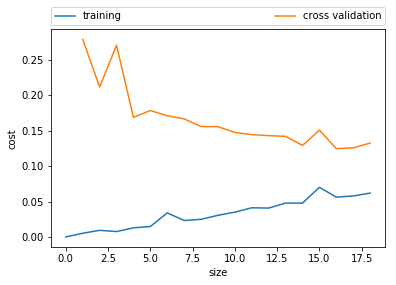

In [10]:
def learningcurve(X, Y, crossX, crossY):
    error_train = [0]*19;
    error_val = [0]*19;
    value = 0
    for i in range(5, 100 , 5):
        x1 = X[0:i, :]
        y1 = Y[0:i,:]
        
        #initalize theta
        m, n = x1.shape
        theta = np.zeros(shape=(n, 1))
        theta = train(theta, x1, y1)
        
        
        error_train[value] = cost_function(theta,x1, y1)
        error_val[value] = cost_function(theta, crossX, crossY)
        value+=1 

    return error_train, error_val
train_curve, cross_curve = learningcurve(X, Y, crossX, crossY)
plt.plot(train_curve, label="training")
plt.plot(cross_curve, label="cross validation")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('cost')
plt.xlabel('size')
plt.show()

Finally, compare the logistic regression from scratch algorithm with the built in sklean function. 

In [11]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets

regr.fit(X, Y)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(crossX) - crossY) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(crossX, crossY))
p = np.matrix(regr.predict(crossX))
t = (p == crossY.T)
print ("cross accuracy:", np.mean(t)*100)


Coefficients: 
 [[  3.89698917e-01   3.89698917e-01   1.30949474e-04  -9.85316969e-01
   -5.76591913e-01   2.56187102e+00  -1.86641383e+00  -3.25808497e-01
    2.05420935e-02   5.44655008e-01  -2.17683461e-01]]
Mean squared error: 0.46
Variance score: 0.77
cross accuracy: 76.9662921348


C:\Users\Veerpal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accurage score is the same!